In [ ]:
import datetime
print(datetime.datetime.now())

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import itertools

import scipy


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
df = pd.read_csv("/Users/Derek/Desktop/MMA/MMA869 Machine Learning and AI/Assignment 1/jewelry_customers.csv")

In [ ]:
X = df.copy()
scaler = StandardScaler()
features = ['Income', 'SpendingScore','Age','Savings']
X[features] = scaler.fit_transform(X[features])

In [ ]:
k_means = KMeans(init='k-means++', n_clusters=5, n_init=10, random_state=42)
k_means.fit(X)

In [ ]:
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = X[k_means.labels_==label].copy()
    X_tmp.loc['mean'] = X_tmp.mean()
    X_tmp.tail(13)

In [ ]:
from scipy.spatial import distance

for i, label in enumerate(set(k_means.labels_)):    
    X_tmp = X[k_means.labels_==label].copy()
    
    exemplar_idx = distance.cdist([k_means.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(X_tmp.iloc[exemplar_idx])
   
    print('\nCluster {}:'.format(label))
    exemplar

Text(0.5, 1.0, 'Snake Plot, K-Means, K=5')

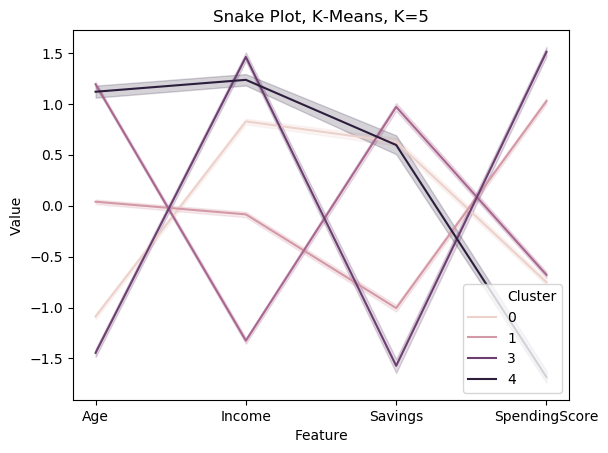

In [11]:
import seaborn as sns
dat = X.copy()

dat['Cluster'] = k_means.labels_

datamart_melt = pd.melt(dat.reset_index(),
id_vars=['Cluster'],
value_vars=['Income','SpendingScore','Age','Savings'],
var_name='Feature',
value_name='Value')

plt.title('Snake Plot, K-Means, K=5')
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=datamart_melt)

In [ ]:
cluster_avg = dat.groupby(['Cluster']).mean()
population_avg = dat.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(8, 2));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');